# Imports

In [1]:
from WordleBot import WordleBot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Basic usage
Assign the wordle to the bot (pick from the list, pick randomly, or just give it a word). 
Bot filters the list of possible words according to the information it has, 
then guesses the highest-scoring word that remains

In [3]:
bot = WordleBot()
bot.set_wordle(bot.wordles[208])
#bot.pick_wordle(209) # equivalent to above
#bot.pick_random_wordle()
#bot.set_todays_wordle()
#bot.set_wordle('kiosk')

while not bot.solved:
    bot.filter_possible_words()
    guess = bot.make_guess() # Pick first word in filtered, scored list. Alternatively pick randomly with bot.make_random_guess()
    bot.check_guess(guess)

bot.print_colours()

🟩🟨⬛⬛⬛
🟩⬛⬛🟩⬛
🟩⬛⬛🟩⬛
🟩🟩🟩🟩🟩


or, for the basic setup of picking today's wordle and solving it with the very basic strategy above:

In [4]:
bot = WordleBot()
bot.solve() # solve() will set today's wordle if you neglected to set it already

🟨⬛⬛⬛⬛
⬛⬛🟨🟨⬛
⬛🟨🟨⬛🟨
⬛🟩🟩🟨🟩
🟩🟩🟩🟩🟩


# Script for testing out strategies

Success rate: 84.22%
Median guesses: 5
Mean guesses: 4.99


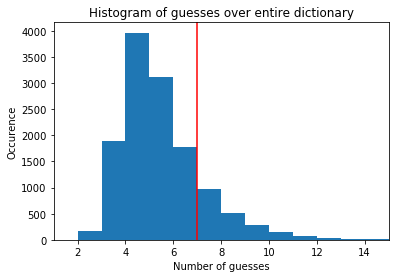

In [5]:
num_of_guesses_to_get_answer = []

n = len(bot.dictionary)
i = 0
for wordle in bot.dictionary:
    i += 1
    print('\r{}/{}'.format(i,n),end='')
    
    bot = WordleBot()
    bot.set_wordle(wordle)
    
    ### PUT YOUR STRATEGY HERE ###
    while not bot.solved:
        bot.filter_possible_words()
        guess = bot.make_guess()
        bot.check_guess(guess)
    ### PUT YOUR STRATEGY HERE ###
    
    num_of_guesses_to_get_answer.append(bot.num_of_guesses)

success_rate = (np.array(num_of_guesses_to_get_answer)<7).sum()/n*100
print('\rSuccess rate: {:.2f}%'.format(success_rate))
print('Median guesses: {:.0f}'.format(np.median(num_of_guesses_to_get_answer)))
print('Mean guesses: {:.2f}'.format(np.mean(num_of_guesses_to_get_answer)))

plt.hist(num_of_guesses_to_get_answer,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y_max = plt.ylim()[1]
plt.vlines(7,0,y_max,colors='r')
plt.xlim([1,15])
plt.ylim([0,y_max])
plt.xlabel('Number of guesses')
plt.ylabel('Occurence')
plt.title('Histogram of guesses over entire dictionary')
plt.show()